In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_filename = ('./flight-price-prediction/Clean_Dataset.csv')

In [3]:
#Reading the CSV file
df = pd.read_csv(data_filename)
df.shape #Shape of the dataset. This dataset has 300,153 rows and 12 columns

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Dropping useless column
df = df.drop(['Unnamed: 0', 'arrival_time'],axis = 1)

df.head()

,airline,flight,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Mumbai,Economy,2.33,1,5955


In [5]:
df.columns #Viewing all the columns of the dataset

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [6]:
df.info() #info() gives us the information about the shape, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


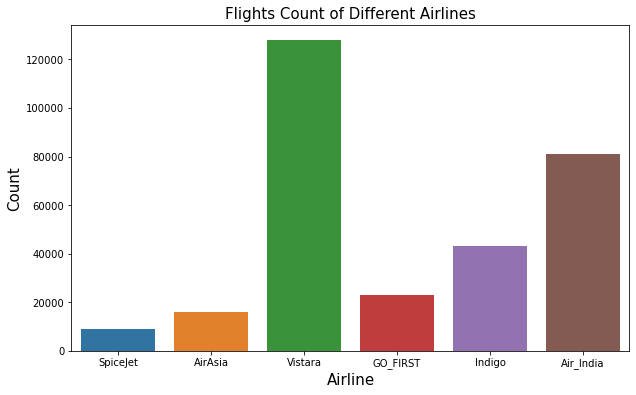

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline',data=df)
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Text(0.5, 0, 'Price in ₹')

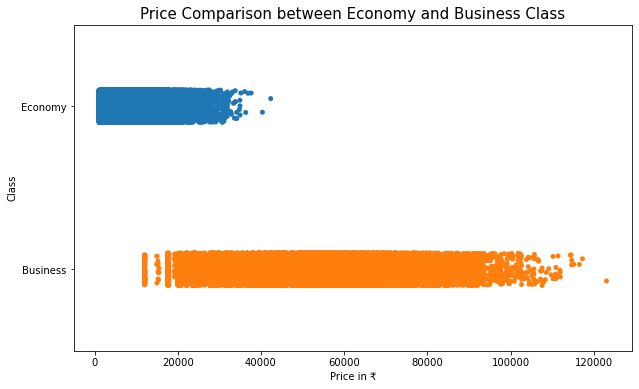

In [8]:
plt.figure(figsize=(10,6))
sns.stripplot(x='price',y='class',data=df)
plt.title('Price Comparison between Economy and Business Class',fontsize=15)
plt.ylabel('Class')
plt.xlabel('Price in ₹')

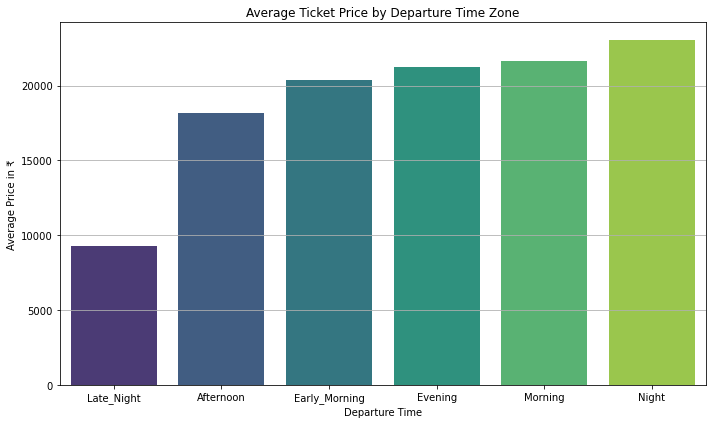

In [9]:
# 출발 시간대별 평균 가격 계산
mean_prices = df.groupby('departure_time')['price'].mean().sort_values()

# 출발 시간대에 따른 평균 가격 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette="viridis")
plt.title('Average Ticket Price by Departure Time Zone')
plt.xlabel('Departure Time')
plt.ylabel('Average Price in ₹')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
df = df.drop('flight',axis = 1) # Dropping useless columns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [12]:
import matplotlib.pyplot as plt

# Specify a font that is available in Google Colab
plt.rcParams['font.family'] = 'NanumGothic'

### 데이터 전처리 (원 핫 인코드)

In [13]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['departure_time']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['departure_time']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('departure_time', axis=1, inplace=True)


# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['source_city']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['source_city']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('source_city', axis=1, inplace=True)

# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['destination_city']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['destination_city']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('destination_city', axis=1, inplace=True)

# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['class']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['class']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('class', axis=1, inplace=True)


# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['airline']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['airline']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('airline', axis=1, inplace=True)

# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['stops']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['stops']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('stops', axis=1, inplace=True)




clean_dataset_encoded.head()

,duration,days_left,price,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,source_city_Chennai,source_city_Delhi,...,destination_city_Kolkata,destination_city_Mumbai,class_Economy,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops_two_or_more,stops_zero
0,2.17,1,5953,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.33,1,5953,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.25,1,5955,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,5955,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### 모든 Feature 고려

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Mean Squared Error: 45967985.54755914
Root Mean Squared Error: 6779.969435591811
Mean Absolute Error: 4560.291628632177
R-squared: 0.9108252836139138


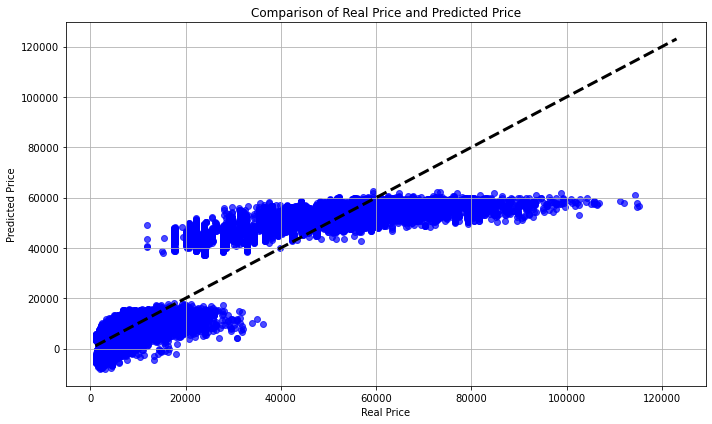

In [14]:
# Split training and test data sets
X = clean_dataset_encoded.drop(['price'], axis=1)
#X = clean_dataset_encoded.drop(['price','airline','stops','arrival_time','source_city','destination_city','duration'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 19958267.53375756
Root Mean Squared Error: 4467.467686929314
Mean Absolute Error: 1753.2471389781947
R-squared: 0.9612823397484085


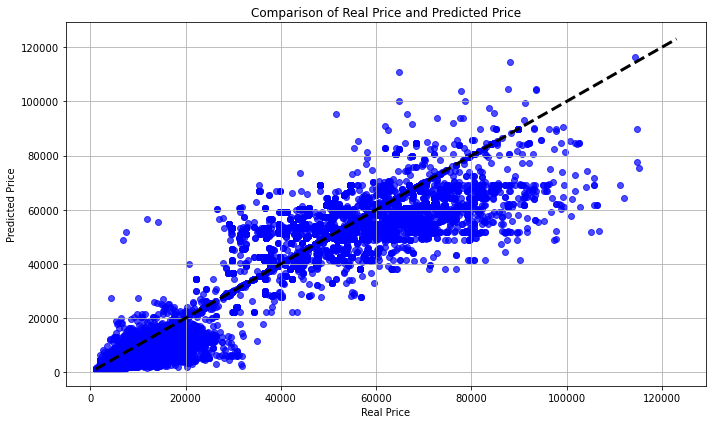

In [15]:

# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=20,max_depth=14 ,random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()



### airline만 고려

In [16]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['airline']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['airline']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('airline', axis=1, inplace=True)

# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['class']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['class']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('class', axis=1, inplace=True)



Mean Squared Error: 58331396.03800914
Root Mean Squared Error: 7637.4993314571975
Mean Absolute Error: 4741.415544439583
R-squared: 0.886841121355814


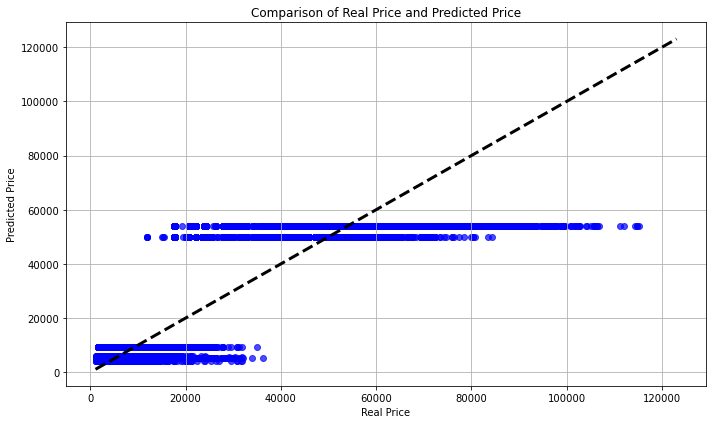

Mean Squared Error: 64815403.630024485
Root Mean Squared Error: 8050.801427809811
Mean Absolute Error: 4858.957438656694
R-squared: 0.8742625945577456


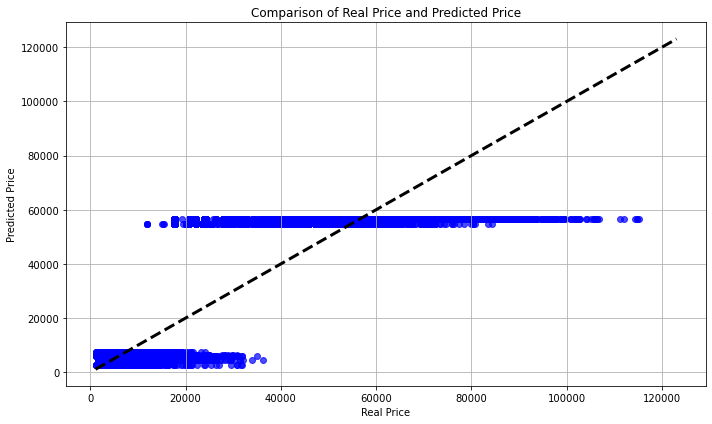

In [17]:
# Split training and test data sets
X = clean_dataset_encoded.drop(['price','stops','source_city','destination_city','duration','departure_time','days_left'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()




# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=20,max_depth=14 ,random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### duration만 고려

In [18]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['class']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['class']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('class', axis=1, inplace=True)

clean_dataset_encoded.head()

,airline,source_city,departure_time,stops,destination_city,duration,days_left,price,class_Economy
0,SpiceJet,Delhi,Evening,zero,Mumbai,2.17,1,5953,1.0
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,2.33,1,5953,1.0
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,2.17,1,5956,1.0
3,Vistara,Delhi,Morning,zero,Mumbai,2.25,1,5955,1.0
4,Vistara,Delhi,Morning,zero,Mumbai,2.33,1,5955,1.0


Mean Squared Error: 59087223.983464316
Root Mean Squared Error: 7686.821448652513
Mean Absolute Error: 4809.885857497457
R-squared: 0.8853748673559969


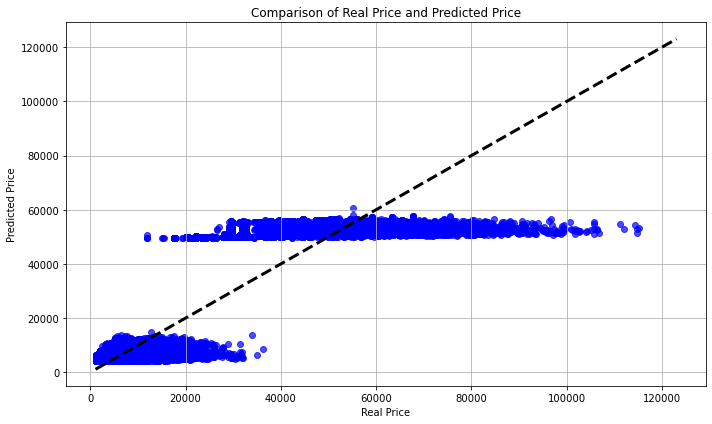

Mean Squared Error: 52818226.28626876
Root Mean Squared Error: 7267.614896667872
Mean Absolute Error: 4404.879695490663
R-squared: 0.8975362898115025


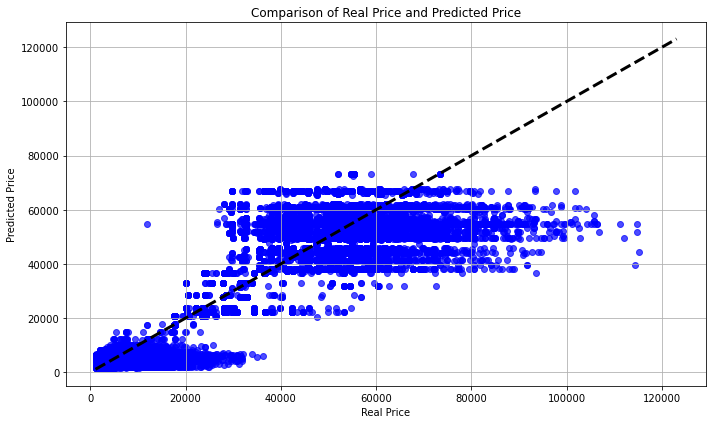

In [19]:
# Split training and test data sets
X = clean_dataset_encoded.drop(['price','stops','source_city','destination_city','departure_time','airline','days_left'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()




# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=20,max_depth=14 ,random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### 출발시간만 고려

Mean Squared Error: 61727341.51340871
Root Mean Squared Error: 7856.674965493273
Mean Absolute Error: 4871.5295805997175
R-squared: 0.8802532217334115


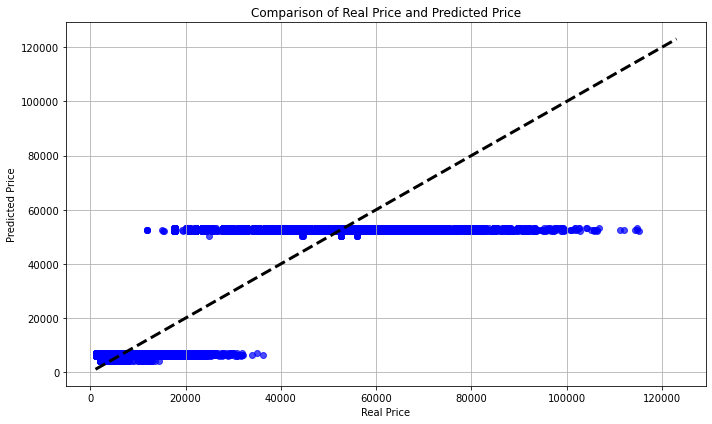

Mean Squared Error: 75128875.95149173
Root Mean Squared Error: 8667.691500710655
Mean Absolute Error: 5385.895787176625
R-squared: 0.8542551707329391


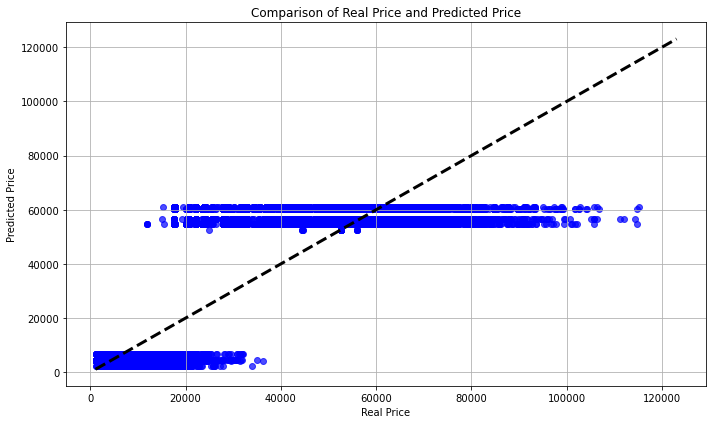

In [20]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['class']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['class']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('class', axis=1, inplace=True)

# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['departure_time']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['departure_time']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([clean_dataset_encoded, encoded_df], axis=1)
clean_dataset_encoded.drop('departure_time', axis=1, inplace=True)

clean_dataset_encoded.head()

# Split training and test data sets
X = clean_dataset_encoded.drop(['price','stops','source_city','destination_city','duration','airline','days_left'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()




# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=20,max_depth=14 ,random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 58565066.23553067
Root Mean Squared Error: 7652.781601191208
Mean Absolute Error: 4614.440196034437
R-squared: 0.8863878173151072


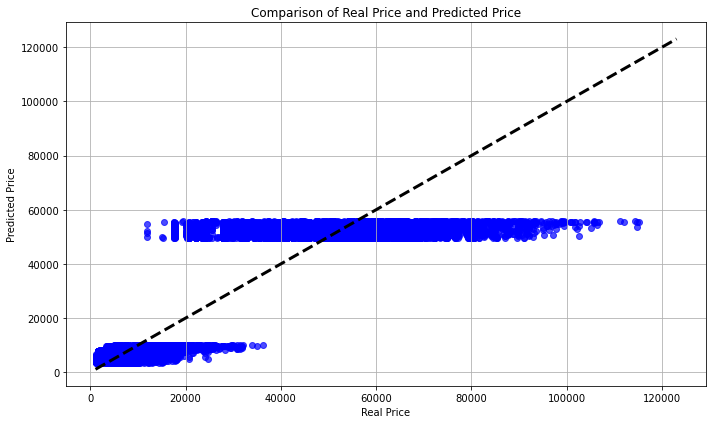

Mean Squared Error: 71483420.54988256
Root Mean Squared Error: 8454.786842368207
Mean Absolute Error: 5257.062284486348
R-squared: 0.8613271023754577


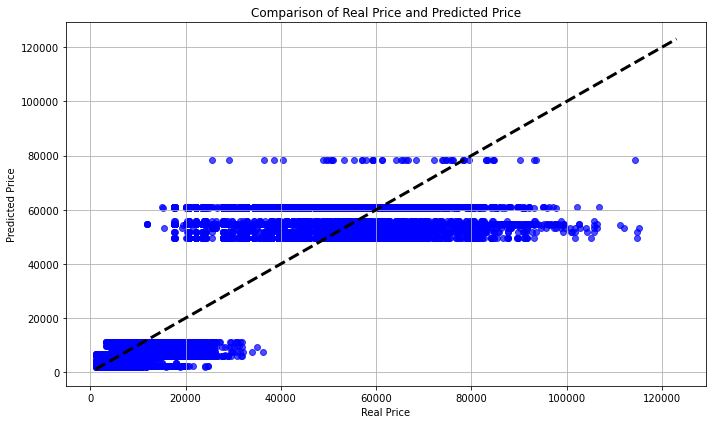

In [21]:
# One-hot encoding: 'department_time' column
encoder = OneHotEncoder(drop='first')
encoded_departure_time = encoder.fit_transform(df[['class']]).toarray()
encoded_df = pd.DataFrame(encoded_departure_time, columns=encoder.get_feature_names_out(['class']))

# Add the encoded column to the main data frame and remove the original 'department_time' column
clean_dataset_encoded = pd.concat([df, encoded_df], axis=1)
clean_dataset_encoded.drop('class', axis=1, inplace=True)


clean_dataset_encoded.head()

# Split training and test data sets
X = clean_dataset_encoded.drop(['price','stops','source_city','destination_city','duration','airline','departure_time'], axis=1)
y = clean_dataset_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Application
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()




# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=20,max_depth=14 ,random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize prediction and actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Real Price and Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()